<center><img src=img/MScAI_brand.png width=70%></center>

# Scikit-Learn: Unsupervised Learning

Recall the workflow:

* import
* instantiate
* fit
* evaluate
* predict

For unsupervised learning, such as clustering, the process is exactly the same. Let's consider the well-known Iris dataset, which is built-in to Seaborn. We'll start by importing and taking a quick look at the dataset.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


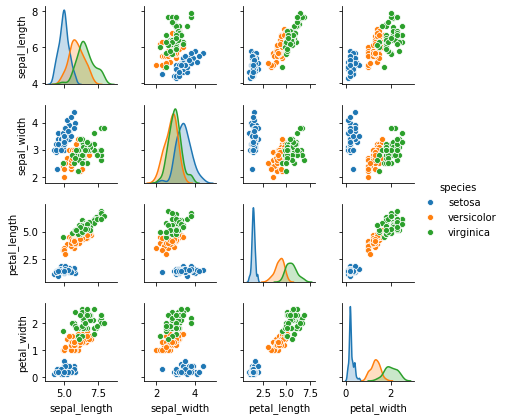

In [2]:
sns.pairplot(iris, hue='species', height=1.5);

In [3]:
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

We're not going to make predictions, so a train-test split is not needed in this example.

We're going to use the famous $k$-means approach to clustering. We import, instantiate and fit:

In [4]:
from sklearn.cluster import KMeans

In [5]:
km = KMeans(n_clusters=3) # I know the dataset!

In [6]:
km.fit(X_iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Score

Next we'll evaluate the method.

In [7]:
km.score(X_iris) # same data we trained on 

-78.8514414261457

But what does that mean?

In [8]:
help(km.score)

Help on method score in module sklearn.cluster.k_means_:

score(X, y=None, sample_weight=None) method of sklearn.cluster.k_means_.KMeans instance
    Opposite of the value of X on the K-means objective.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}, shape = [n_samples, n_features]
        New data.
    
    y : Ignored
        not used, present here for API consistency by convention.
    
    sample_weight : array-like, shape (n_samples,), optional
        The weights for each observation in X. If None, all observations
        are assigned equal weight (default: None)
    
    Returns
    -------
    score : float
        Opposite of the value of X on the K-means objective.



"the K-means objective" is a measure of how good our clustering is: we try to minimise the within-cluster sum of squared distances. Our `score` is the negative, so larger values (closer to zero) are better.

### Using the model

In unsupervised learning, what is the output? We can look at the labels for the training data. Note that these are just labels and the ordering (0, 1, 2) is arbitrary. Although there are three species in the data, we have not used the species labels in training. Our hope is only that we'll find approximately the same three clusters in our unsupervised learning.

In [9]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

This gives us another way to evaluate performance: we can compare the labels with the cluster labels.

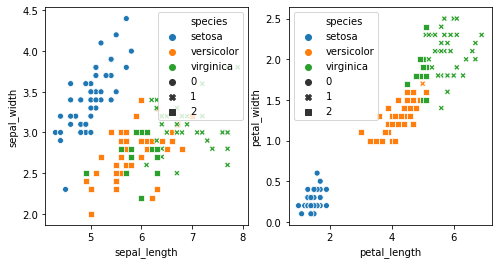

In [10]:
fig, axs = plt.subplots(1, 2)
sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", 
                hue="species", style=km.labels_, ax=axs[0])
sns.scatterplot(data=iris, x="petal_length", y="petal_width", 
                hue="species", style=km.labels_, ax=axs[1])
plt.gcf().set_size_inches(8, 4)

As we can see, there is a strong correspondence between the cluster labels and the `y` species labels. This is an artificial evaluation, because when training we pretended we didn't have any `y`. We wouldn't be able to do this with a real unsupervised dataset. But it confirms that the clustering is along the expected lines.

Another thing we can do is predict, for a new point, which cluster it would fall into.

In [11]:
km.predict([[2, 2, 2, 2]])

array([0], dtype=int32)

Of course, the result must be interpreted with respect to the integer labels we found above.

**Example**: the same API we just used for KMeans works for Gaussian Mixture, another model which can be used
both for density estimation (and hence anomaly detection) and also clustering. The following is from PDSH
but note PDSH is out of date here: it mentions `GMM` which is now known as `GaussianMixture`.

In [12]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3,
            covariance_type='full')
model.fit(X_iris)
y = model.predict(X_iris)

### Exercise

1. Try out multiple values of $k$ and plot `score()` against $k$. Where do you think is the "knee" or the "sweet spot" trading off model simplicity (small $k$) against performance (large `score`)?

### Solution


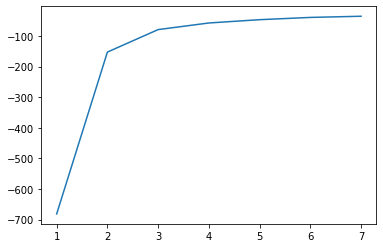

In [21]:
scores = [
    KMeans(n_clusters=k).fit(X_iris).score(X_iris)
    for k in range(1, 8)]
sns.lineplot(range(1, 8), scores);

Observe that the constructor `KMeans` returns a `KMeans` object and the `fit` method returns the same object (after fitting), so we can chain these calls and the `score` call on one line.